In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('D:\Google Drive\placements.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df=df.iloc[:,1:]


In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [8]:
df.shape

(100, 3)

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'CGPA')

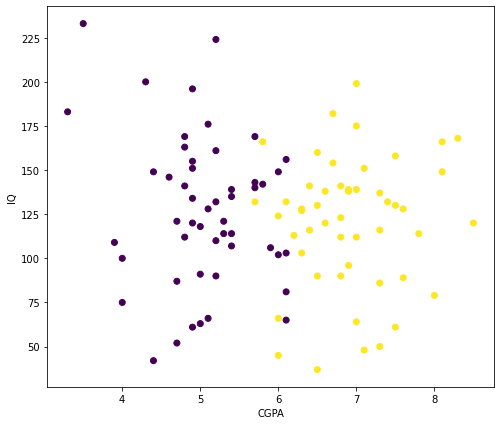

In [10]:
plt.figure(figsize=(8,7))
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.ylabel('IQ')
plt.xlabel('CGPA')

# Yellow points showing got placements


## X AND Y

## X is independent variable and Y is dependent variable 

In [11]:
x=df.iloc[:,:2]
y=df.iloc[:,-1]

In [12]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [13]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [16]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(80, 2)
(80,)
(20, 2)
(20,)


## SCALING 

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [19]:
xtrain=scaler.fit_transform(xtrain)

In [20]:
xtest=scaler.fit_transform(xtest)

In [21]:
xtrain

array([[ 0.54318501,  1.46148849],
       [-0.96974809, -1.45305799],
       [ 1.04749604,  0.37756625],
       [-0.88569625, -0.73044316],
       [ 0.62723685, -0.75453032],
       [-0.29733338,  0.44982773],
       [-0.63354074, -0.17643845],
       [ 0.87939237, -1.76619108],
       [ 2.05611811, -0.03191549],
       [-0.29733338,  0.52208921],
       [-0.96974809,  0.7147865 ],
       [ 0.79534053, -1.3807965 ],
       [ 0.79534053,  0.42574057],
       [ 1.63585892, -1.01948909],
       [-2.31457752,  1.48557566],
       [-0.96974809,  0.81113515],
       [-0.80164442,  1.31696553],
       [-0.04517786,  0.06443316],
       [ 1.21559972, -1.45305799],
       [-0.5494889 , -0.34504858],
       [ 0.62723685,  0.47391489],
       [-0.80164442,  0.1607818 ],
       [-0.71759258,  0.25713044],
       [-1.13785177, -0.8267918 ],
       [-0.80164442, -1.33262218],
       [ 0.71128869,  0.42574057],
       [-0.21328154,  1.07609392],
       [ 0.03887398, -0.44139723],
       [ 0.37508133,

In [22]:
xtest

array([[ 1.35452659, -1.21868723],
       [ 0.65390939, -0.18646581],
       [-0.63055548,  0.94564802],
       [-0.39701642, -0.61933286],
       [ 0.88744846, -0.08657341],
       [-0.51378595, -0.3862506 ],
       [ 1.35452659,  0.17980631],
       [-2.14855943, -0.78582018],
       [ 1.23775706, -0.31965567],
       [-0.04670781,  1.21202774],
       [ 0.30360079,  0.54607843],
       [-0.39701642,  0.21310378],
       [-0.86409455, -0.48614299],
       [ 1.00421799,  0.17980631],
       [-0.39701642,  0.07991392],
       [-1.09763362,  1.21202774],
       [ 0.42037032,  0.77916069],
       [-0.98086409,  2.11105931],
       [ 1.47129613, -0.68592779],
       [-1.21440315, -2.68377571]])

## MODELLING

## LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [25]:
# predicting
ypred_test=lr.predict(xtest)
ypred_train=lr.predict(xtrain)

In [26]:
ytest

66    1
70    1
47    0
41    0
57    1
2     0
11    1
31    0
0     1
84    0
33    0
12    0
67    0
48    1
49    0
75    0
8     0
80    0
29    1
94    0
Name: placement, dtype: int64

### COMPARISION ACTUAL VS PREDICT

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(ytest,ypred_test)



0.85

### since accuracy_score is 95% and variance between train and test is low we can say it's a good model

In [29]:
accuracy_score(ytrain,ypred_train)

0.9125

## Plot Decisions regions

In [32]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

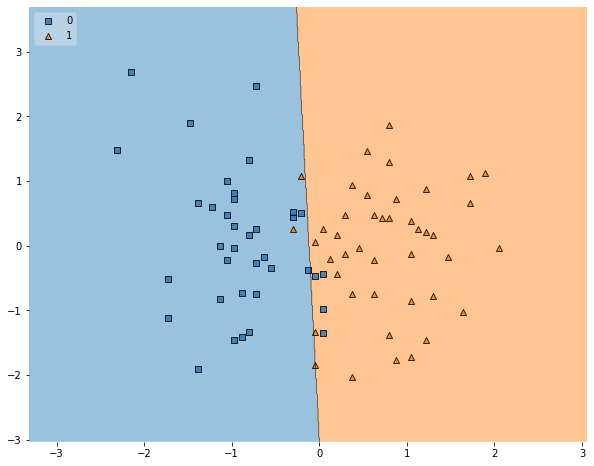

In [35]:
plt.figure(figsize=(10,8))
plot_decision_regions(xtrain,ytrain.values,clf=lr,legend=2)

# This is how model classifies two different classes